# Week 2.2 code for textual analysis

## Install
If it's the first time you are using a library you may also need to install it. 

You can do this using pip in the following way. 

`pip install package_name`


If you are working in Colab you need to add an exclamation mark in front. For example, to install numpy:

`!pip install numpy`

You can also search for and add libraries or 'packages' within the Anaconda GUI (graphical user interface) console.



## import 

Once we have installed them on our computer, we need to tell the code that we want them availabke to use. We do this using `import`. 

We can 'import' existing libraries - or packages of code - that are widely available.

Some that will be useful are:

- nltk,  is especially for working with textual data, and has a lot of inbuilt functions to perform key tasks.
(Check out the NLTK book: https://www.nltk.org/book/ch01.html)
- spaCy, is another a free and open-source Natural Language Processing (NLP) package. If you're interested in learning how to work with spaCy more broadly for a variety of NLP tasks I recommend the tutorial Natural Language Processing with spaCy in Python: https://realpython.com/natural-language-processing-spacy-python/.
- gensim, is dedicated to topic modeling, and has some really useful tutorials and materials to read through: https://radimrehurek.com/gensim/auto_examples/index.html#core-tutorials-new-users-start-here  
- pandas, a data analysis library
- numpy, a mathematical functions library
    

In [1]:
# uncomment only the one you need

# for colab use:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install nltk

#if neither of these are working you can try...
#sudo pip install numpy

### numpy as np

Import the numpy library, name it np for shorthand so that we can refer to it in the code as 'np'

This allows us to get unique words in our vocabulary 

In [3]:
import numpy as np
import pandas as pd
import re, os
import csv
import nltk
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaunaadmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#Load your text 
f = open('frankenstein.txt')
text = f.read()


# if you would rather copy and paste text like we did in the tutorial, uncomment the code below and add your own text

# text = " add your text here "

In [38]:
# we will make all words lowercase so that *that* and *That* 
# will be counted together when we come to count words!


text = text.lower()


### Tokenize

NLTK has functions inbuilt to perform many of the tasks you need.

`sent_tokenize()` - splits your text into sentences. 

In [39]:
## Tokenizing

from nltk.tokenize import sent_tokenize, word_tokenize

## tokenize the data and store the tokens in a lists

sentences = []
sentences = sent_tokenize(text)

tokens = word_tokenize(text)

print(sentences[1])

print(tokens[3])

you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online at
www.gutenberg.org.
ebook


### Unique tokens and basic counts


In [40]:
#Get the unique tokens (our vocabulary)
vocab = np.unique(tokens)
print("total words:",len(tokens), "unique words:", len(vocab))
#Create a Bag of Words using a Counter
Counter(tokens).most_common(50)

total words: 88781 unique words: 7702


[(',', 5105),
 ('the', 4375),
 ('and', 3038),
 ('i', 2839),
 ('.', 2800),
 ('of', 2762),
 ('to', 2169),
 ('my', 1773),
 ('a', 1441),
 ('in', 1186),
 ('that', 1030),
 ('was', 1023),
 (';', 972),
 ('me', 857),
 ('with', 713),
 ('but', 690),
 ('had', 686),
 ('you', 643),
 ('he', 604),
 ('not', 586),
 ('which', 565),
 ('it', 559),
 ('as', 536),
 ('his', 533),
 ('for', 522),
 ('by', 490),
 ('“', 480),
 ('on', 471),
 ('this', 448),
 ('from', 400),
 ('be', 376),
 ('have', 372),
 ('her', 371),
 ('at', 330),
 ('is', 329),
 ('when', 329),
 ('were', 308),
 ('”', 293),
 ('your', 261),
 ('or', 254),
 ('she', 253),
 ('!', 239),
 ('?', 220),
 ('him', 220),
 ('if', 215),
 ('an', 215),
 ('all', 215),
 ('so', 209),
 ('they', 207),
 ('one', 204)]

This has counted all of the punctuation as tokens, we might not want them included...

### Removing punctuation 
There are lots of different ways to remove punctuation, for example...

In [41]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

test_sample = "This is a sentence - it has lots, that's right, lots of punctuation!!!!"
test_sample_no_punct = tokenizer.tokenize(test_sample)

print(test_sample)
print(test_sample_no_punct)


This is a sentence - it has lots, that's right, lots of punctuation!!!!
['This', 'is', 'a', 'sentence', 'it', 'has', 'lots', 'that', 's', 'right', 'lots', 'of', 'punctuation']


In [42]:
# We can also do it by writing our own regular expression or regex
# A regular expression is a sequence of characters that specifies a search pattern in text. 
# Read more about Regex here: https://www.w3schools.com/python/python_regex.asp 

#So instead let's just u a regex to split based on space AND punctuation
tokens = re.split(r'[-\s.,;!?]+', text)


In [58]:
#this time when we run this piece of code the punctuation should have gone

vocab = np.unique(tokens)
print("unique words", vocab.shape)
Counter(tokens).most_common(50)

#Get the unique tokens (our vocabulary)
vocab = np.unique(tokens)
print("total words:",len(tokens), "unique words:", len(vocab))
#Create a Bag of Words using a Counter
Counter(tokens).most_common(50)

unique words (11705,)
total words: 78122 unique words: 11705


[('the', 4339),
 ('and', 3001),
 ('of', 2759),
 ('i', 2719),
 ('to', 2157),
 ('my', 1751),
 ('a', 1438),
 ('in', 1177),
 ('was', 997),
 ('that', 993),
 ('with', 709),
 ('had', 681),
 ('but', 670),
 ('he', 574),
 ('which', 547),
 ('his', 533),
 ('me', 529),
 ('you', 525),
 ('as', 525),
 ('for', 511),
 ('not', 510),
 ('by', 482),
 ('it', 460),
 ('on', 452),
 ('this', 410),
 ('from', 399),
 ('have', 367),
 ('be', 362),
 ('her', 328),
 ('at', 327),
 ('is', 321),
 ('when', 309),
 ('were', 299),
 ('your', 255),
 ('or', 246),
 ('she', 240),
 ('an', 215),
 ('if', 206),
 ('they', 202),
 ('so', 201),
 ('all', 199),
 ('will', 196),
 ('could', 194),
 ('one', 191),
 ('are', 189),
 ('their', 184),
 ('been', 182),
 ('we', 178),
 ('would', 178),
 ('no', 171)]

Although the punctuation is gone there are still lots of words which aren't the most informative - like 'are', 'at', etc. 

Also can you spot the duplicates? Why might that be happening? We have *the* and *The*....

We need to make all words lowercase so that *the* and *The* are counted together!

## Removing stop words

Before we start counting words, we might want to consider which words we are interested in counting.

Some words are frequent but don't carry much meaning in ad of themselves, for examples common words in English such as "a", "the", "it".  

NLTK has a pre-defined set of stopwords

In [45]:
from nltk.corpus import stopwords

In [46]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:

# If you want to add additional stopwords you would do it like this...

# stopwords = set(nltk.corpus.stopwords.words('english'))
# stopwords = nltk.corpus.stopwords.words('english')
# newStopWords = ['pick','some', 'words','to','add']
# stopwords.extend(newStopWords)
# print(stop_words)



Now we can filter our text to remove stopwords

In [49]:
filtered_tokens = []

filtered_tokens = [w for w in tokens if not w in stop_words]

We can compare the effect this has on the text by runing teh next two bloack of code (if you are using a text other thank frakenstein the slices selected won't make sense so you can swal the numbers to `[0:100]` in both boxes for a more straightforward comparison. 

In [50]:
print(tokens[280:400])

['i', 'am', 'already', 'far', 'north', 'of', 'london,', 'and', 'as', 'i', 'walk', 'in', 'the', 'streets', 'of', 'petersburgh,', 'i', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks,', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight.', 'do', 'you', 'understand', 'this', 'feeling?', 'this', 'breeze,', 'which', 'has', 'travelled', 'from', 'the', 'regions', 'towards', 'which', 'i', 'am', 'advancing,', 'gives', 'me', 'a', 'foretaste', 'of', 'those', 'icy', 'climes.', 'inspirited', 'by', 'this', 'wind', 'of', 'promise,', 'my', 'daydreams', 'become', 'more', 'fervent', 'and', 'vivid.', 'i', 'try', 'in', 'vain', 'to', 'be', 'persuaded', 'that', 'the', 'pole', 'is', 'the', 'seat', 'of', 'frost', 'and', 'desolation;', 'it', 'ever', 'presents', 'itself', 'to', 'my', 'imagination', 'as', 'the', 'region', 'of', 'beauty', 'and', 'delight.', 'there,', 'margaret,', 'the', 'sun', 'is', 'for', 'ever', 'visible,', 'its', 'broad', 'disk', 'just', 'skirtin

In [53]:
print(filtered_tokens[194:300])

['already', 'far', 'north', 'london,', 'walk', 'streets', 'petersburgh,', 'feel', 'cold', 'northern', 'breeze', 'play', 'upon', 'cheeks,', 'braces', 'nerves', 'fills', 'delight.', 'understand', 'feeling?', 'breeze,', 'travelled', 'regions', 'towards', 'advancing,', 'gives', 'foretaste', 'icy', 'climes.', 'inspirited', 'wind', 'promise,', 'daydreams', 'become', 'fervent', 'vivid.', 'try', 'vain', 'persuaded', 'pole', 'seat', 'frost', 'desolation;', 'ever', 'presents', 'imagination', 'region', 'beauty', 'delight.', 'there,', 'margaret,', 'sun', 'ever', 'visible,', 'broad', 'disk', 'skirting', 'horizon', 'diffusing', 'perpetual', 'splendour.', 'there—for', 'leave,', 'sister,', 'put', 'trust', 'preceding', 'navigators—there', 'snow', 'frost', 'banished;', 'and,', 'sailing', 'calm', 'sea,', 'may', 'wafted', 'land', 'surpassing', 'wonders', 'beauty', 'every', 'region', 'hitherto', 'discovered', 'habitable', 'globe.', 'productions', 'features', 'may', 'without', 'example,', 'phenomena', 'heav

Now stop words and punctuation gace been removed let's plot our frequency distribution

In [54]:
# Counter is a module that helps with counting
from collections import Counter

# Count the frequency of words
word_freq = Counter(filtered_tokens)
word_freq

Counter({'\ufeffthe': 1,
         'project': 83,
         'gutenberg': 25,
         'ebook': 8,
         'frankenstein,': 8,
         'mary': 3,
         'wollstonecraft': 3,
         '(godwin)': 3,
         'shelley': 3,
         'use': 21,
         'anyone': 7,
         'anywhere': 2,
         'united': 21,
         'states': 12,
         'parts': 5,
         'world': 25,
         'cost': 2,
         'almost': 40,
         'restrictions': 2,
         'whatsoever.': 2,
         'may': 111,
         'copy': 8,
         'it,': 33,
         'give': 24,
         'away': 37,
         're-use': 2,
         'terms': 26,
         'license': 12,
         'included': 3,
         'online': 4,
         'www.gutenberg.org.': 2,
         'located': 7,
         'states,': 4,
         'check': 5,
         'laws': 14,
         'country': 22,
         'using': 7,
         'ebook.': 2,
         'title:': 1,
         'frankenstein': 11,
         'or,': 4,
         'modern': 12,
         'prometheus': 2,


### Creating a Frequency Distribution

We can count the frequency of each unique word in the text to create a frequency distribution:


In [55]:
# Counter is a module that helps with counting
from collections import Counter

# Count the frequency of words
word_freq = Counter(filtered_tokens)
word_freq

Counter({'\ufeffthe': 1,
         'project': 83,
         'gutenberg': 25,
         'ebook': 8,
         'frankenstein,': 8,
         'mary': 3,
         'wollstonecraft': 3,
         '(godwin)': 3,
         'shelley': 3,
         'use': 21,
         'anyone': 7,
         'anywhere': 2,
         'united': 21,
         'states': 12,
         'parts': 5,
         'world': 25,
         'cost': 2,
         'almost': 40,
         'restrictions': 2,
         'whatsoever.': 2,
         'may': 111,
         'copy': 8,
         'it,': 33,
         'give': 24,
         'away': 37,
         're-use': 2,
         'terms': 26,
         'license': 12,
         'included': 3,
         'online': 4,
         'www.gutenberg.org.': 2,
         'located': 7,
         'states,': 4,
         'check': 5,
         'laws': 14,
         'country': 22,
         'using': 7,
         'ebook.': 2,
         'title:': 1,
         'frankenstein': 11,
         'or,': 4,
         'modern': 12,
         'prometheus': 2,


In [56]:
#get the ten most common words
common_words = word_freq.most_common(10)
common_words

[('could', 194),
 ('one', 191),
 ('would', 178),
 ('me,', 148),
 ('yet', 138),
 ('upon', 127),
 ('may', 111),
 ('might', 107),
 ('me.', 107),
 ('every', 106)]

<IPython.core.display.Javascript object>


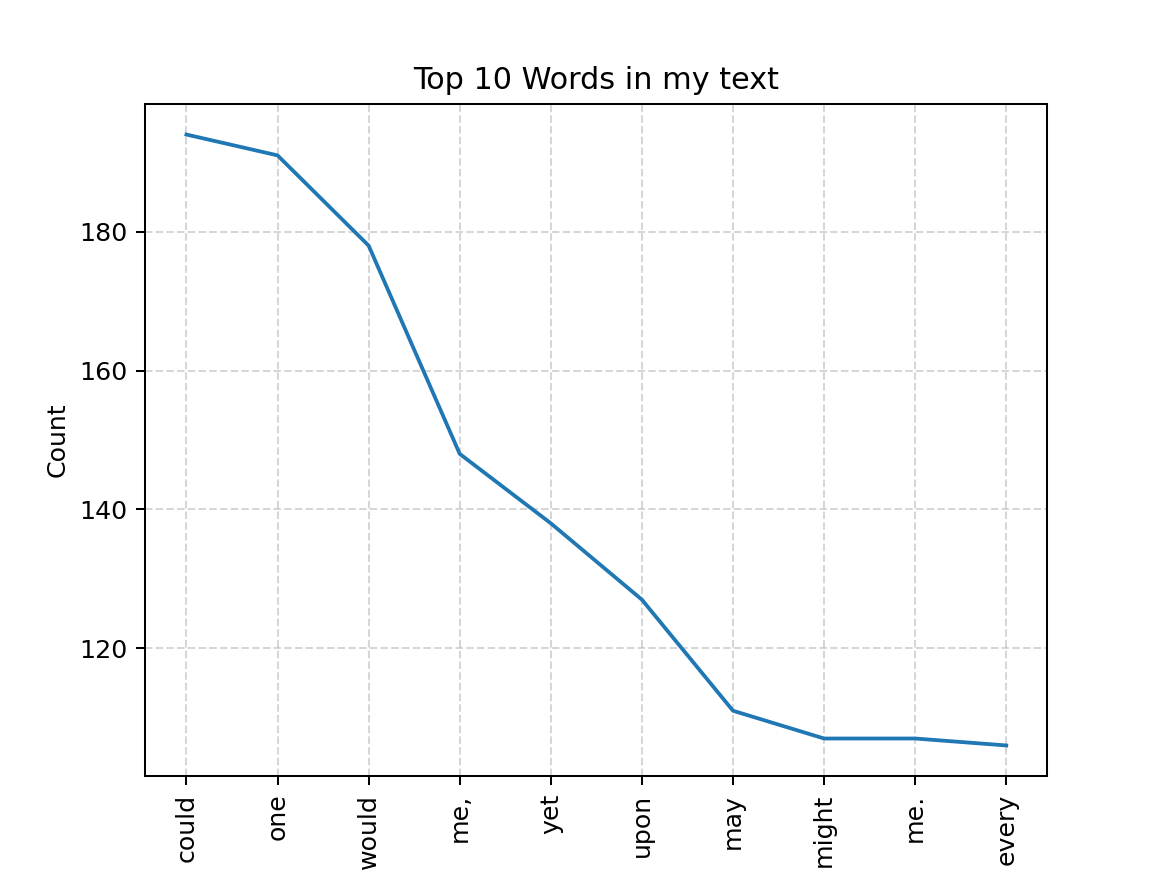

In [57]:
# Display the plot inline in the notebook with interactive controls
# Comment out this line if you are running the notebook in Deepnote
%matplotlib notebook

# Import the matplotlib plot function
import matplotlib.pyplot as plt

# Get a list of the most common words
words = [word for word,_ in common_words]

# Get a list of the frequency counts for these words
freqs = [count for _,count in common_words]

# Set titles, labels, ticks and gridlines
plt.title("Top 10 Words in my text")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(range(len(words)), [str(s) for s in words], rotation=90)
plt.grid(visible=True, which='major', color='#333333', linestyle='--', alpha=0.2)

# Plot the frequency counts
plt.plot(freqs)

# Show the plot
plt.show()

# Go Further

If you would like something more challenging check out these notebooks which includes topic modelling on a shakespeare corpus:

https://github.com/sgsinclair/alta/blob/master/ipynb/ArtOfLiteraryTextAnalysis.ipynb
